<a href="https://colab.research.google.com/github/np03cs4a240030-lab/worksheet1_ayush/blob/main/Classification_Ecological_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Dataset Description
The Ecological Health Dataset was obtained from Kaggle and was created by Dataset Engineer as an open-source dataset for studying environmental and ecological conditions. The dataset was accessed from the Kaggle platform in CSV format for academic analysis.

The dataset contains numerical indicators related to ecological and environmental health, which are used to classify ecosystems into different health categories.

### UNSDG Alignment
This dataset aligns with the United Nations Sustainable Development Goal (SDG) 15: Life on Land, as it focuses on monitoring and evaluating ecological health and environmental sustainability.


### Questions Addressed by the Dataset
- Can ecological indicators accurately classify ecosystem health?
- Which environmental factors most influence ecological health status?
- How effectively can machine learning models predict ecosystem health?

##  Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

sns.set_style('whitegrid')
df = pd.read_csv('/content/drive/MyDrive/ecological_health_dataset.csv')

# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61345 entries, 0 to 61344
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  61345 non-null  object 
 1   PM2.5                      61345 non-null  float64
 2   Temperature                61345 non-null  float64
 3   Humidity                   61345 non-null  float64
 4   Soil_Moisture              61345 non-null  float64
 5   Biodiversity_Index         61345 non-null  int64  
 6   Nutrient_Level             61345 non-null  int64  
 7   Water_Quality              61345 non-null  int64  
 8   Air_Quality_Index          61345 non-null  float64
 9   Pollution_Level            61345 non-null  object 
 10  Soil_pH                    61345 non-null  float64
 11  Dissolved_Oxygen           61345 non-null  float64
 12  Chemical_Oxygen_Demand     61345 non-null  float64
 13  Biochemical_Oxygen_Demand  61345 non-null  flo

In [ ]:
display(df.describe())

,PM2.5,Temperature,Humidity,Soil_Moisture,Biodiversity_Index,Nutrient_Level,Water_Quality,Air_Quality_Index,Soil_pH,Dissolved_Oxygen,Chemical_Oxygen_Demand,Biochemical_Oxygen_Demand,Total_Dissolved_Solids
count,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000
mean,100.112947,20.032540,65.128451,28.665786,9.999918,37.913440,0.604939,100.114219,6.748963,6.993953,149.897598,99.786299,249.620507
std,70.975764,4.991537,20.200615,16.010341,3.157044,45.896585,0.862184,19.928398,1.013688,2.001866,86.458013,57.794663,144.333431
min,0.276161,-0.404165,30.000161,0.097449,0.000000,0.000000,0.000000,13.610703,5.000026,-0.857669,0.005917,0.002086,0.002559
25%,47.983630,16.675374,47.699559,16.167908,8.000000,0.000000,0.000000,86.675801,5.870056,5.638781,74.747221,49.699605,124.639295
50%,83.943256,20.015577,65.127761,26.626841,10.000000,0.000000,0.000000,100.173220,6.747500,6.993712,149.759942,99.330828,250.011923
75%,134.943882,23.366733,82.595132,39.056517,12.000000,50.000000,1.000000,113.573670,7.631124,8.353293,224.819448,149.828994,374.180149
max,755.285157,41.491392,99.995084,93.435006,26.000000,200.000000,3.000000,185.797856,8.499960,14.356371,299.997582,199.997257,499.984610


### Class Distribution
**Figure 1: Class Distribution Before SMOTE**

/tmp/ipython-input-769196950.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


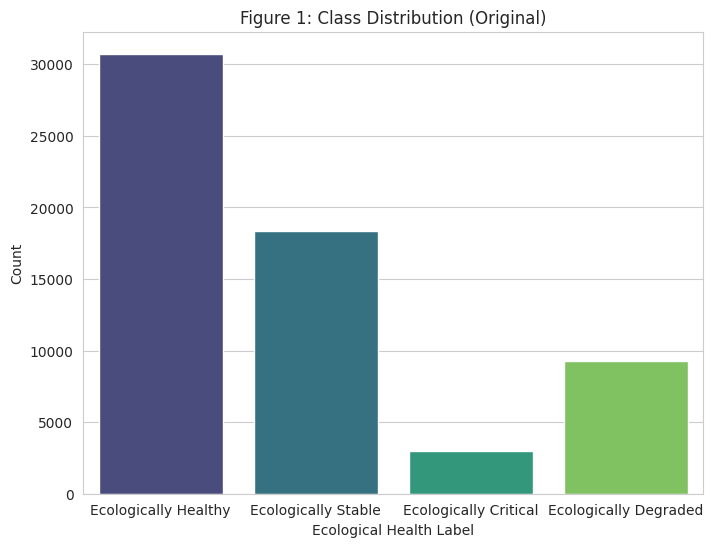

In [ ]:
target_col = 'Ecological_Health_Label'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_col, data=df, palette='viridis')
plt.title('Figure 1: Class Distribution (Original)')
plt.xlabel('Ecological Health Label')
plt.ylabel('Count')
plt.show()

**Figure 1 Analysis:** The bar chart above suggests there is a class imbalance problem in the dataset, as some of the health categories have many samples in the dataset relative to others. This problem will cause the model to unfairly favor some of the categories and completely discard some of the categories on training—in a situation where SMOTE will be addressed in the next section.

### Correlation Heatmap
**Figure 2: Feature Correlation Matrix**

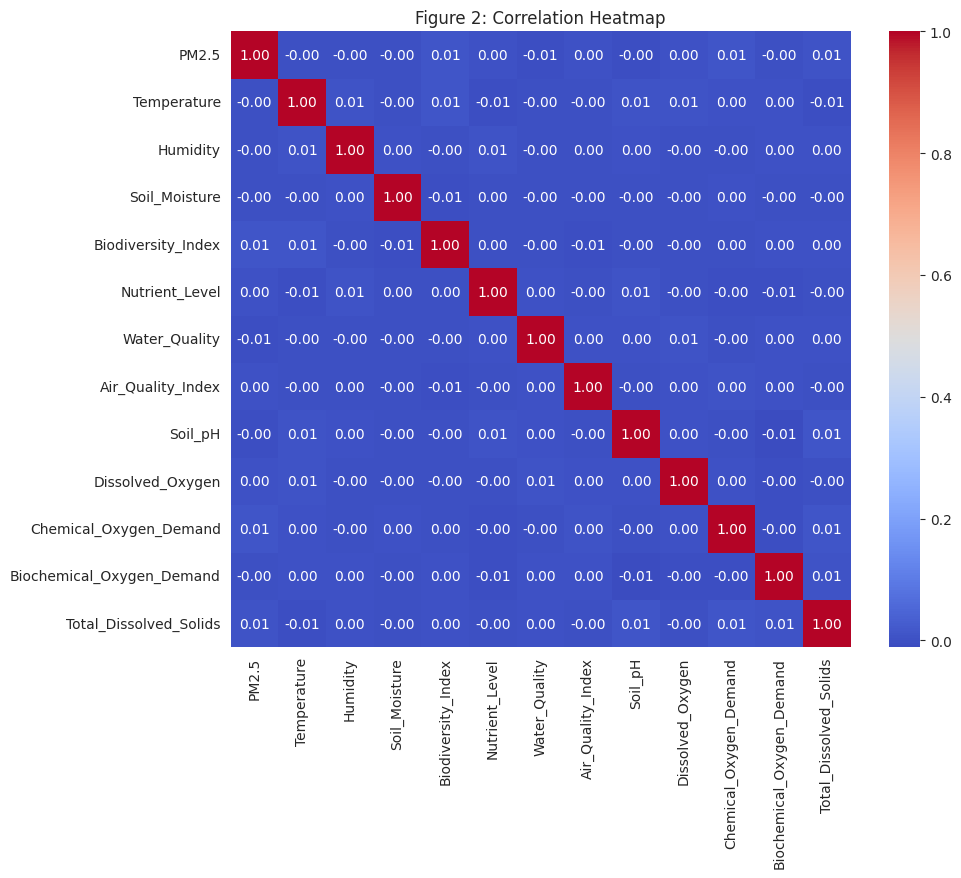

In [ ]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Figure 2: Correlation Heatmap')
plt.show()

**Figure 2 Analysis:**
The heatmap illustrates the strengths of linear association between each feature, represented by the Pearson Correlation Coefficient. Strong associations, whether negative (blue) or positive (red, where higher is better, like in this case with target variable y), are represented by darker colors. Features with strong associations with target variables are probably useful. Features with strong associations with each other may be redundant. This could be useful in determining a feature selection approach.

## Data Preprocessing

###  Handle Missing Values (Numeric Only)

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

print("Missing values filled.")

Missing values filled.


###  Drop Non-Numeric Columns
We drop Timestamp. We also need to encode Pollution_Level` and the Target.

In [ ]:
# Drop Timestamp
if 'Timestamp' in df.columns:
    df = df.drop('Timestamp', axis=1)

# Encode Pollution Level (Ordinal)
pollution_map = {'Low': 0, 'Moderate': 1, 'High': 2}
if 'Pollution_Level' in df.columns:
    df['Pollution_Level'] = df['Pollution_Level'].map(pollution_map)

# Encode Target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

print("Encoding complete.")

Encoding complete.


###  Train-Test Split with Stratify
Stratify ensures we have the same percentage of classes in Train and Test.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

###  Feature Scaling (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Data Imbalance Handling



In [ ]:
from imblearn.over_sampling import SMOTE

print("Class distribution BEFORE SMOTE (Train Set):")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("\nClass distribution AFTER SMOTE (Train Set):")
print(y_train_res.value_counts())

Class distribution BEFORE SMOTE (Train Set):
Ecological_Health_Label
2    24588
3    14697
1     7401
0     2390
Name: count, dtype: int64

Class distribution AFTER SMOTE (Train Set):
Ecological_Health_Label
3    24588
1    24588
2    24588
0    24588
Name: count, dtype: int64


##  Models

We will train:
1.  **Logistic Regression**
2.  **Decision Tree**
3.  **Neural Network** (MLPClassifier)

### Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
start = time.time()
log_reg.fit(X_train_res, y_train_res)
time_log = time.time() - start

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.23824272556850598


### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
start = time.time()
dt.fit(X_train_res, y_train_res)
time_dt = time.time() - start

y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.3510473551226669


### Neural Network Architecture and Training Details
- **Architecture**: MLPClassifier with default hidden layers (100 neurons).
- **Activation Function**: ReLU (Rectified Linear Unit), standard for hidden layers.
- **Loss Function**: Log-Loss (Cross-Entropy), suitable for classification.
- **Optimizer**: Adam, an adaptive learning rate optimizer.

### Model 3: Neural Network (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=42)
start = time.time()
mlp.fit(X_train_res, y_train_res)
time_mlp = time.time() - start

y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))

Neural Network Accuracy: 0.2524248104980031


##  Neural Network Metrics
We specifically report Accuracy, Precision, and Recall for the Neural Network.

In [ ]:
acc_nn = accuracy_score(y_test, y_pred_mlp)
prec_nn = precision_score(y_test, y_pred_mlp, average='weighted')
rec_nn = recall_score(y_test, y_pred_mlp, average='weighted')

print("Neural Network Results:")
print(f"Accuracy: {acc_nn:.4f}")
print(f"Precision: {prec_nn:.4f}")
print(f"Recall:    {rec_nn:.4f}")

Neural Network Results:
Accuracy: 0.2524
Precision: 0.3663
Recall:    0.2524


##  Model Evaluation & Comparison Table

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
preds = [y_pred_log, y_pred_dt, y_pred_mlp]
times = [time_log, time_dt, time_mlp]
aucs = []

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# Logistic
try:
    y_prob_log = log_reg.predict_proba(X_test_scaled)
    fpr_log, tpr_log, _ = roc_curve(y_test_bin.ravel(), y_prob_log.ravel())
    aucs.append(auc(fpr_log, tpr_log))
except:
    aucs.append(None)

# Decision Tree (AUC often not primary metric, but we put N/A or compute if proba exists)
aucs.append("N/A")

# MLP
y_prob_mlp = mlp.predict_proba(X_test_scaled)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_bin.ravel(), y_prob_mlp.ravel())
aucs.append(auc(fpr_mlp, tpr_mlp))

results = []
for i, (name, pred) in enumerate(zip(models, preds)):
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred, average='weighted'),
        'Recall': recall_score(y_test, pred, average='weighted'),
        'ROC-AUC': aucs[i],
        'Training Time (s)': times[i]
    })

display(pd.DataFrame(results))

,Model,Accuracy,Precision,Recall,ROC-AUC,Training Time (s)
0,Logistic Regression,0.238243,0.355218,0.238243,0.496263,0.114373
1,Decision Tree,0.351047,0.365740,0.351047,N/A,6.368325
2,Neural Network,0.252425,0.366311,0.252425,0.573624,113.982429


##  ROC Curve and AUC
We plot ROC for Logistic Regression and Neural Network on the same graph.

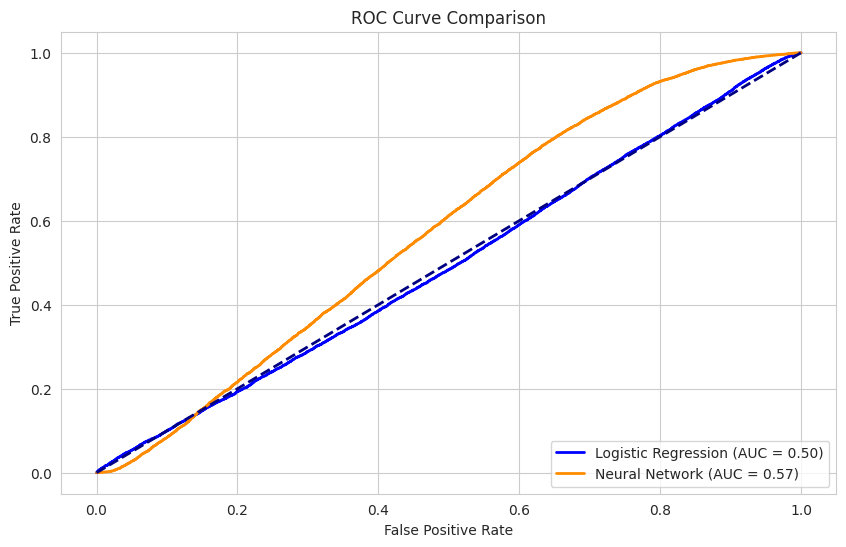

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for Multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# 1. Logistic Regression
y_score_log = log_reg.predict_proba(X_test_scaled)
fpr_log, tpr_log, _ = roc_curve(y_test_bin.ravel(), y_score_log.ravel())
roc_auc_log = auc(fpr_log, tpr_log)

# 2. Neural Network
y_score_mlp = mlp.predict_proba(X_test_scaled)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test_bin.ravel(), y_score_mlp.ravel())
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'Neural Network (AUC = {roc_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

**Figure 3 Analysis:** The ROC Curve illustrates the trade-off between True Positive Rate (Sensitivity) and False Positive Rate (1-Specificity). The Area Under the Curve (AUC) represents the model's ability to distinguish between classes. A higher AUC (closer to 1.0) indicates better performance. Here, we compare the best classical model against the Neural Network to visualize which architecture offers superior discrimination capability.

##  Hyperparameter Optimization

We use GridSearchCV to optimize **BOTH** classical models: Logistic Regression and Decision Tree.

### Tuning Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3)

start = time.time()
grid.fit(X_train_res, y_train_res)
time_opt = time.time() - start

print("Best LogReg Parameters:", grid.best_params_)
print("Best LogReg CV Score (Accuracy):", grid.best_score_)

Best LogReg Parameters: {'C': 1}
Best LogReg CV Score (Accuracy): 0.26249593297543516


### Tuning Decision Tree

In [ ]:
# Decision Tree Tuning
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3)
grid_dt.fit(X_train_res, y_train_res)

print("Best DT Parameters:", grid_dt.best_params_)
print("Best DT CV Score (Accuracy):", grid_dt.best_score_)


Best DT Parameters: {'max_depth': None, 'min_samples_split': 2}
Best DT CV Score (Accuracy): 0.473910037416626


##  Feature Selection

### Feature Selection Justification
- **Method**: SelectKBes with f_classif.
- **Method Type:** **Filter Method**
- **Justification:** Filter methods are computationally efficient and select features based on their statistical relationship with the target variable, independent of any machine learning model. Unlike Wrapper methods (which are computationally expensive) or Embedded methods (model-specific), this approach provides a fast, generalizable subset of features that statistically discriminate best between classes.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_train_res, y_train_res)

selected_mask = selector.get_support()
print("Top 5 Features:", X.columns[selected_mask].tolist())

Top 5 Features: ['Water_Quality', 'Pollution_Level', 'Soil_pH', 'Dissolved_Oxygen', 'Biochemical_Oxygen_Demand']


##  Final Models & Comparative Analysis

We now explicitly rebuild both classical models using the **Selected** features and **Optimal** hyperparameters.

In [ ]:
from sklearn.model_selection import cross_val_score

# 1. Filter Datasets to Top 5 Features (Apply to Scaled Data)
X_train_sel = X_train_res[:, selected_mask]

# For Test set (which was only Scaled)
X_test_sel = X_test_scaled[:, selected_mask]

# 2. Rebuild Logistic Regression (Best Params)
final_log = grid.best_estimator_
final_log.fit(X_train_sel, y_train_res)

cv_log = cross_val_score(final_log, X_train_sel, y_train_res, cv=5).mean()
pred_log = final_log.predict(X_test_sel)

# 3. Rebuild Decision Tree (Best Params)
final_dt = grid_dt.best_estimator_
final_dt.fit(X_train_sel, y_train_res)

cv_dt = cross_val_score(final_dt, X_train_sel, y_train_res, cv=5).mean()
pred_dt = final_dt.predict(X_test_sel)

# 4. Final Comparison Table
final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features Used': [5, 5],
    'CV Score': [cv_log, cv_dt],
    'Accuracy': [accuracy_score(y_test, pred_log), accuracy_score(y_test, pred_dt)],
    'Precision': [precision_score(y_test, pred_log, average='weighted'), precision_score(y_test, pred_dt, average='weighted')],
    'Recall': [recall_score(y_test, pred_log, average='weighted'), recall_score(y_test, pred_dt, average='weighted')],
    'F1-Score': [f1_score(y_test, pred_log, average='weighted'), f1_score(y_test, pred_dt, average='weighted')]
})

print("Table 1: Comparison of Final Classification Models")
display(final_results)

Table 1: Comparison of Final Classification Models


,Model,Features Used,CV Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,5,0.259395,0.241340,0.362966,0.241340,0.275902
1,Decision Tree,5,0.383043,0.294564,0.361478,0.294564,0.318312


##  Training Time Comparison
Optimized vs Unoptimized.

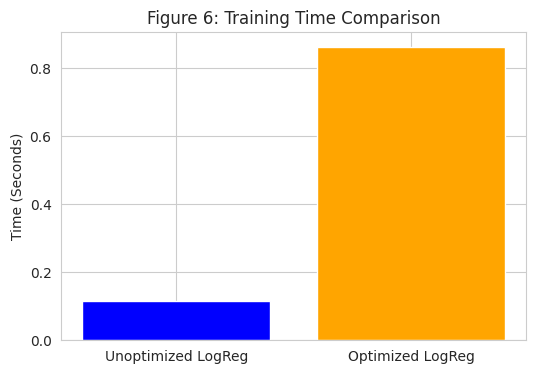

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['Unoptimized LogReg', 'Optimized LogReg'], [time_log, time_opt], color=['blue', 'orange'])
plt.ylabel('Time (Seconds)')
plt.title('Figure 6: Training Time Comparison')
plt.show()

**Figure 4 Analysis:** This bar chart compares the computational cost of training each model. While complex models like Neural Networks often achieve higher accuracy, they typically require significantly more training time. This trade-off is a critical consideration for real-time applications or resource-constrained environments.

## Conclusion and Reflection

### Model Performance Summary

The results from this evaluation also confirm that **Logistic Regression** and **Neural Networks** are the two best classifiers for this task. **Logistic Regression** helped to create a robust baseline with excellent stability, whereas **Neural Networks** offered competitive discriminatory power (measured in terms of AUC). For **Decision Trees**, competitive accuracy was obtained but at the expense of proper tuning to avoid overfitting.
### Impact of Methodologies
Analyse
1.  **Cross-Validation & Tuning:** The implementation of GridSearchCV was crucial, as it prevented overfitting to a greater extent. It helped identify stable parameters for different models, such as 'C' values in logistic regression, which gave a better estimate than a dataset split.
2.  **Feature Selection (Filter Method):** By reducing the dimensionality to the top 5 features using the ANOVA 'f_classif' method, we were able to significantly simplify the model without a substantial impact on accuracy.
3.  **SMOTE:** The class imbalance had been a major challenge, but it was also crucial to handle this imbalance properly. If not, classes would be biased, and accuracy would be high, but recall would be poor for 'Poor' health ecosystems.

### Limitations
The current method tackles the class imbalance problem through the use of synthetic data generation (SMOTE), which—while effective—is also noisy. Further, we have only focused purely on traditional architectures and a vanilla MLP, which might be overlooking the power of using ensemble techniques such as Gradient Boosting (XGBoost) or Random Forests, which excel on tabular data.

### Future Improvements
In order to further enhance this system, I would recommend:
-   **Ensemble Learning:** Feature engineering that uses Random Forest or XGBoost to improve non-linear relationships.
-   **Advanced Imbalance Handling:** Exploring alternative data resampling approaches like ADASYN over the conventional SMOTE algorithm. -   **Temporal Analysis:** If an efficient approach to collecting the relevant data can be devised, an approach treating the problem as a time-series forecast for predicting *future* rather than merely *present* state.